# Phase 1 vs. Phase 1 Volcano Plots

using results from [deseq_p1.v.p1.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase1_v_phase1/deseq_p1.v.p1.ipynb) to generate publication-formatted volcano plots

## 0. load libraries

In [2]:
library(tidyverse) # for ggplot and dplyr
library(cowplot) # for combining plots

## 1. load CSVs

In [3]:
##### comparisons vs. control
# warm vs. control
w.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_cont.csv')

# both vs. control
b.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.both_v_cont.csv')

# hyp vs. control
h.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_cont.csv')

##### other comparisons
# hyp vs. both
h.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_both.csv')

# warm vs. both
w.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_both.csv')

# warm vs. hyp
w.h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_hyp.csv')

## 2. ggplot

### comparisons vs. control

In [4]:
# create function to assign up- and down-regulated to genes
assign_dir <- function(df) {
    new_df <- df %>%
mutate(
    direction = case_when(
        log2FoldChange > 0.5 & padj <= 0.05 ~ "Up",
        log2FoldChange < 0.5 & padj <= 0.05 ~ "Down",
        TRUE ~ "NS"
        )
    )
    }

In [5]:
w.c <- assign_dir(w.c)
h.c <- assign_dir(h.c)
b.c <- assign_dir(b.c)

# check it worked
unique(w.c$direction)
head(w.c)

[1] "NS"   "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111116054,8.739763,0.0074950539,0.10558225,0.45516653,0.9628155,NS
2,LOC111126949,670.509082,-0.0008413897,0.06985369,0.94068617,0.9983738,NS
3,LOC111110729,160.018313,-0.0659273575,0.13361268,0.02972751,0.5352822,NS
4,LOC111112434,13.048074,-0.0124548917,0.10906392,0.26872606,0.8946927,NS
5,LOC111120752,403.233517,0.0128102382,0.07701767,0.33629149,0.9266293,NS
6,LOC111128944,1.594569,-0.0034572083,0.17695745,0.77724045,NA,NS


#### warm vs. control

Warning message:
“Removed 7345 rows containing missing values or values outside the scale range
(`geom_point()`).”


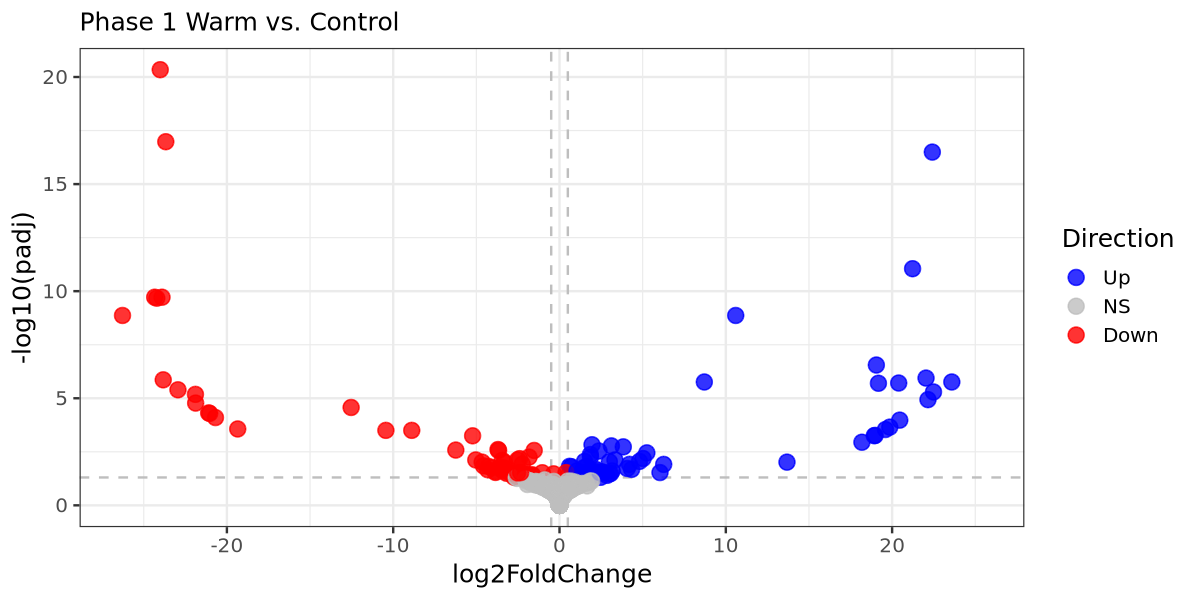

In [33]:
# warm vs. control
ggplot(data = w.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

#### hyp vs. control

Warning message:
“Removed 5371 rows containing missing values or values outside the scale range
(`geom_point()`).”


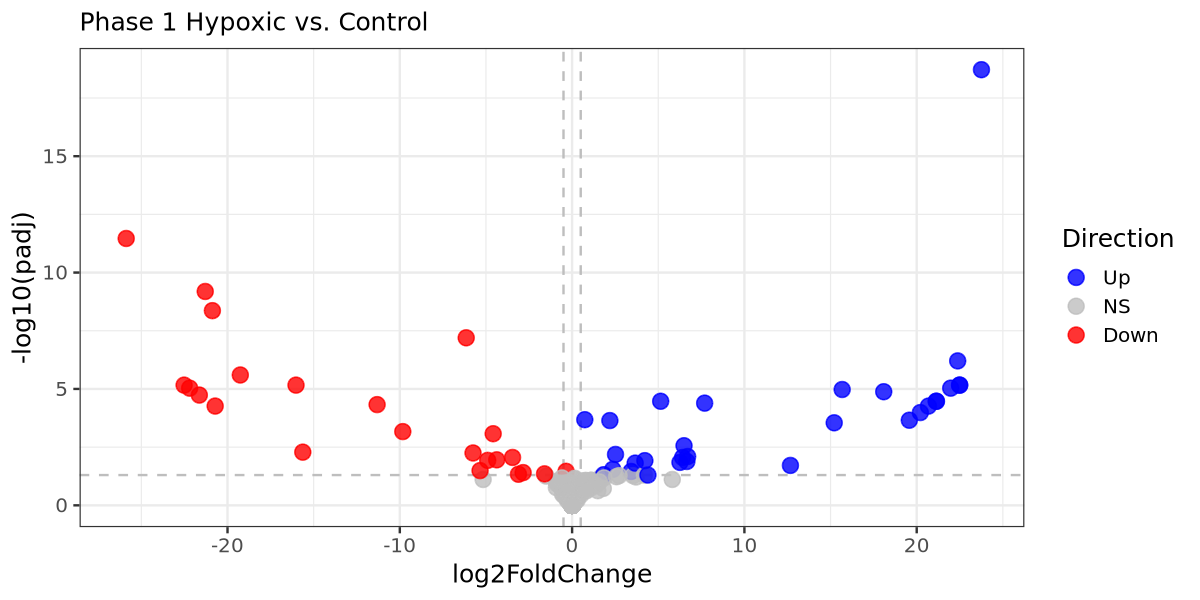

In [34]:
# hyp vs. control
ggplot(data = h.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Hypoxic vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

#### both vs. control

Warning message:
“Removed 7958 rows containing missing values or values outside the scale range
(`geom_point()`).”


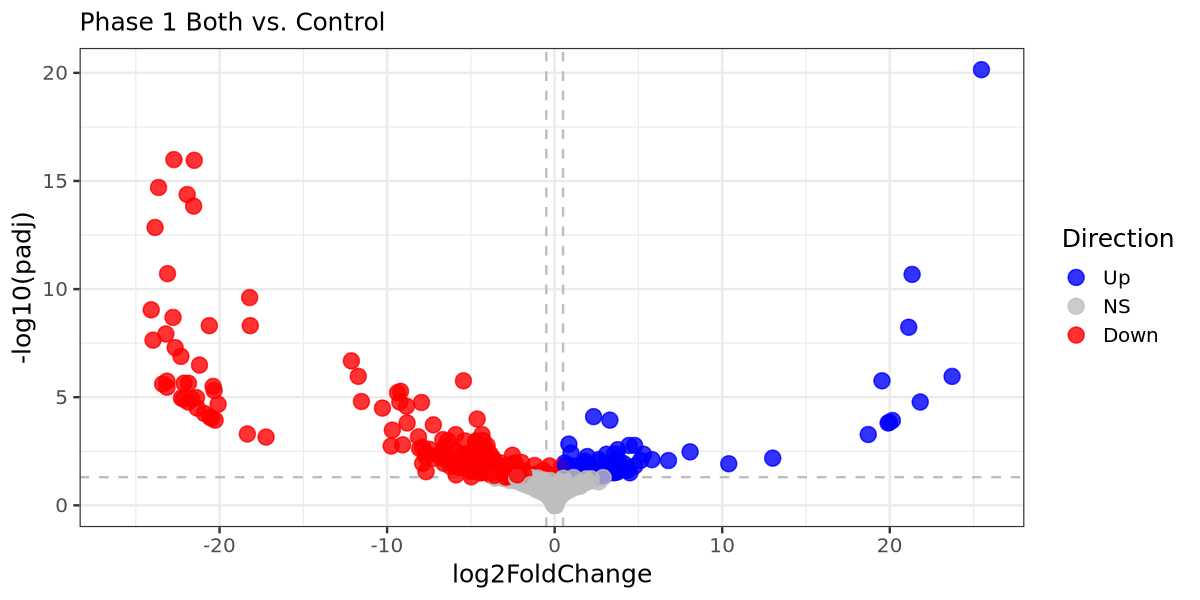

In [36]:
# both vs. control
ggplot(data = b.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Both vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

### other comparisons

In [37]:
# assign GE direction relative to what is "control" - function is above
w.h <- assign_dir(w.h) # warm is "control"
w.b <- assign_dir(w.b) # both is "control"
h.b <- assign_dir(h.b) # both is "control"

# check it worked
unique(w.h$direction)
head(w.h)

[1] "NS"   "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111116054,8.739763,0.02105434,0.1794452,0.536194836,0.9099615,NS
2,LOC111126949,670.509082,-0.01356614,0.1504477,0.795034412,0.9689757,NS
3,LOC111110729,160.018313,0.26573142,0.1871541,0.003676249,0.2214613,NS
4,LOC111112434,13.048074,0.03445700,0.1788035,0.378105153,0.8512991,NS
5,LOC111120752,403.233517,-0.10339030,0.1710581,0.106385661,0.6388378,NS
6,LOC111128944,1.594569,0.01279670,0.2300075,0.515389473,0.9041197,NS


#### warm vs. hypoxic

Warning message:
“Removed 6711 rows containing missing values or values outside the scale range
(`geom_point()`).”


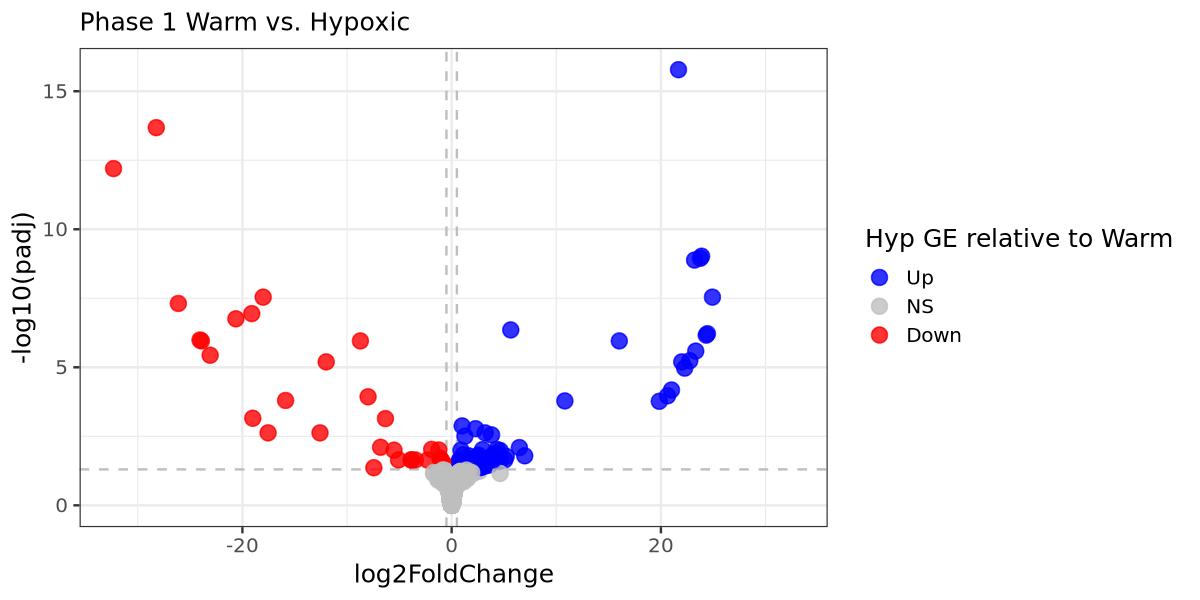

In [38]:
options(repr.plot.width=10, repr.plot.height=5)

# warm vs. hypoxic
ggplot(data = w.h, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Hypoxic',
     col = 'Hyp GE relative to Warm') +
guides(col = guide_legend(reverse = TRUE))

#### hypoxic vs. both

Warning message:
“Removed 7345 rows containing missing values or values outside the scale range
(`geom_point()`).”


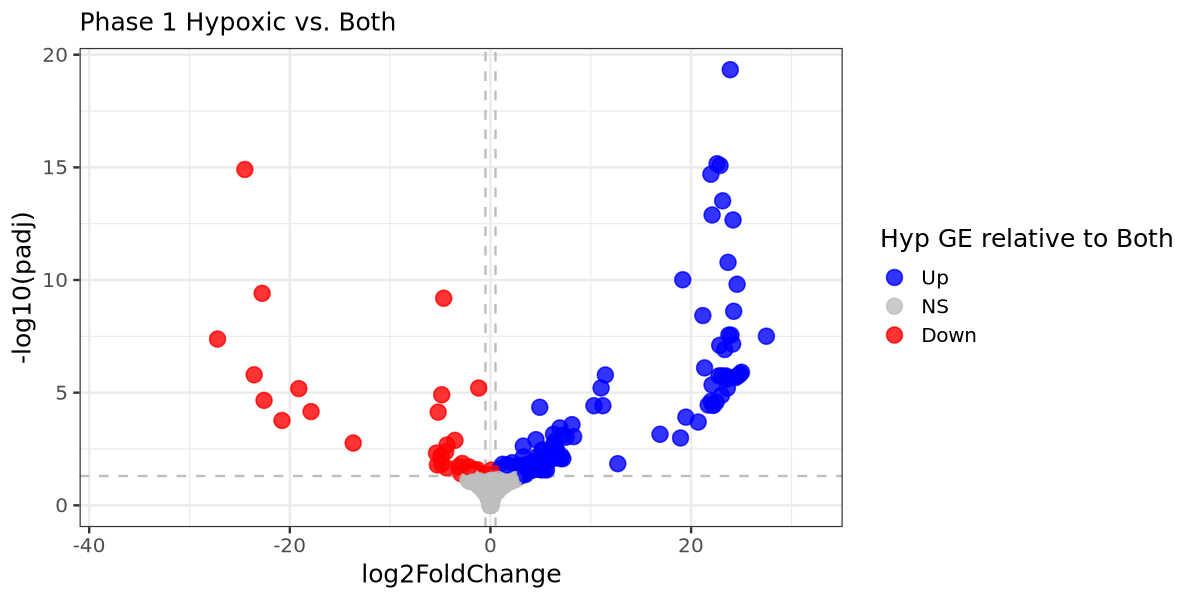

In [39]:
# hypoxic vs. both
ggplot(data = h.b, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Hypoxic vs. Both',
     col = 'Hyp GE relative to Both') +
guides(col = guide_legend(reverse = TRUE))

#### warm vs. both

Warning message:
“Removed 9826 rows containing missing values or values outside the scale range
(`geom_point()`).”


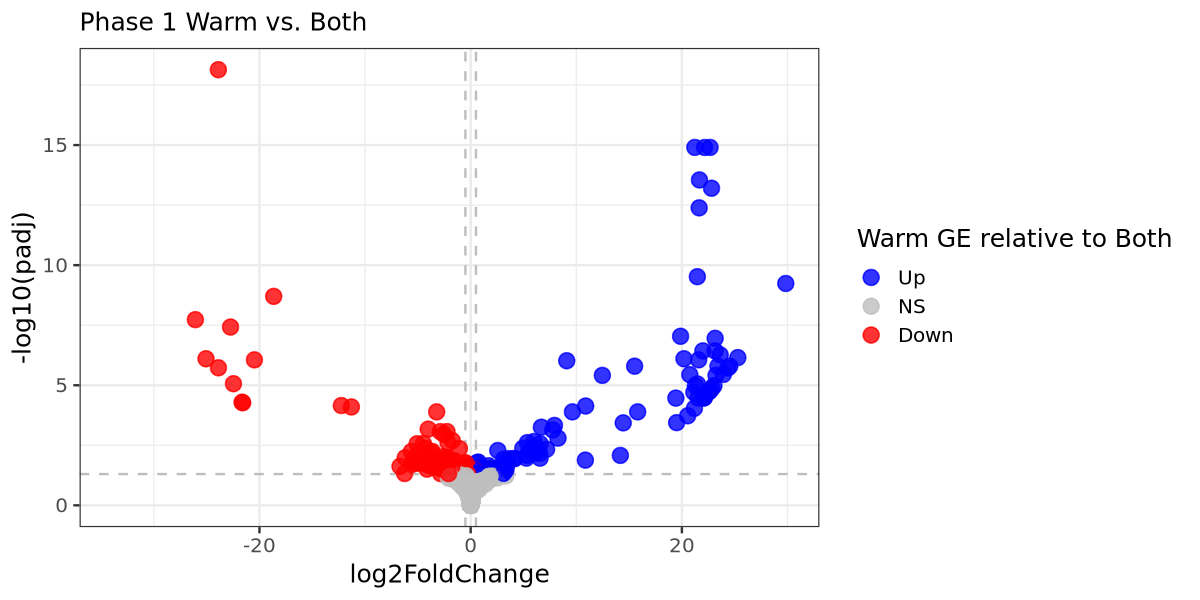

In [40]:
# warm vs. both
ggplot(data = w.b, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Both',
     col = 'Warm GE relative to Both') +
guides(col = guide_legend(reverse = TRUE))

## 3. DEGs barplots
***only for comparisons with control***

In [6]:
find_deg <- function(df, treatment) {
    # pull out DEGs (those that are not NS)
    deg <- df %>%
    filter(direction != 'NS')

    # add col for comparison
    deg$vs_control <- treatment

    return(deg)
    }

In [7]:
w.c.deg <- find_deg(w.c, 'Warm')
h.c.deg <- find_deg(h.c, 'Hypoxic')
b.c.deg <- find_deg(b.c, 'Both')

# check
head(b.c.deg)

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction,vs_control
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111119645,653.22102,-5.0205378,2.4417567,5.708460e-05,1.196733e-02,Down,Both
2,LOC111111234,734.07909,-1.7988843,1.2165285,1.675379e-04,2.586952e-02,Down,Both
3,LOC111104630,30.39451,1.7010652,1.6387946,4.647117e-04,4.910747e-02,Up,Both
4,LOC111100092,5501.68049,0.4225017,0.5389617,4.678287e-04,4.913793e-02,Down,Both
5,LOC111129171,35.65903,-20.5754019,4.2411048,1.349937e-07,8.337208e-05,Down,Both
6,LOC111121183,21.46042,21.1312648,3.1068732,2.821259e-12,5.808033e-09,Up,Both


In [10]:
# combine dfs
df1 <- rbind(w.c.deg, h.c.deg)
control.df <- rbind(df1, b.c.deg)

# check
head(control.df)
tail(control.df)

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction,vs_control
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111130870,2284.04141,0.6048057,0.3311764,3.071487e-05,1.511412e-02,Up,Warm
2,LOC111129171,35.65903,-21.0979119,4.0239489,3.540950e-08,4.848484e-05,Down,Warm
3,LOC111121183,21.46042,19.0512042,3.0024718,8.926857e-11,2.811335e-07,Up,Warm
4,LOC111106303,35.27859,3.3346320,1.1826733,1.254522e-05,7.597818e-03,Up,Warm
5,LOC111122541,163.56702,1.6972850,1.0090617,7.292738e-05,2.702002e-02,Up,Warm
6,LOC111130453,100.84269,2.3712218,0.6373756,3.969454e-06,2.907209e-03,Up,Warm


,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction,vs_control
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
461,LOC111117559,420.39988,23.720235,4.0435562,8.109229e-10,1.088752e-06,Up,Both
462,LOC111117000,63.02543,-2.240370,1.8317941,3.170333e-04,3.854326e-02,Down,Both
463,LOC111116545,33.91908,4.488655,4.0111150,2.275589e-04,3.123119e-02,Up,Both
464,LOC111116556,182.09333,-2.518076,0.8001341,1.578184e-05,4.825182e-03,Down,Both
465,LOC111116802,50.87510,4.119087,1.8509481,5.576541e-05,1.179477e-02,Up,Both
466,LOC111116624,46.82341,19.972808,4.3006508,2.662193e-07,1.468009e-04,Up,Both


In [14]:
# pull out counts for up- and down-regulated DEGs for each comparison with control
vs.cont.df <- control.df %>%
group_by(vs_control, direction) %>%
count()

vs.cont.df

vs_control,direction,n
<chr>,<chr>,<int>
Both,Down,213
Both,Up,85
Hypoxic,Down,23
Hypoxic,Up,30
Warm,Down,58
Warm,Up,57


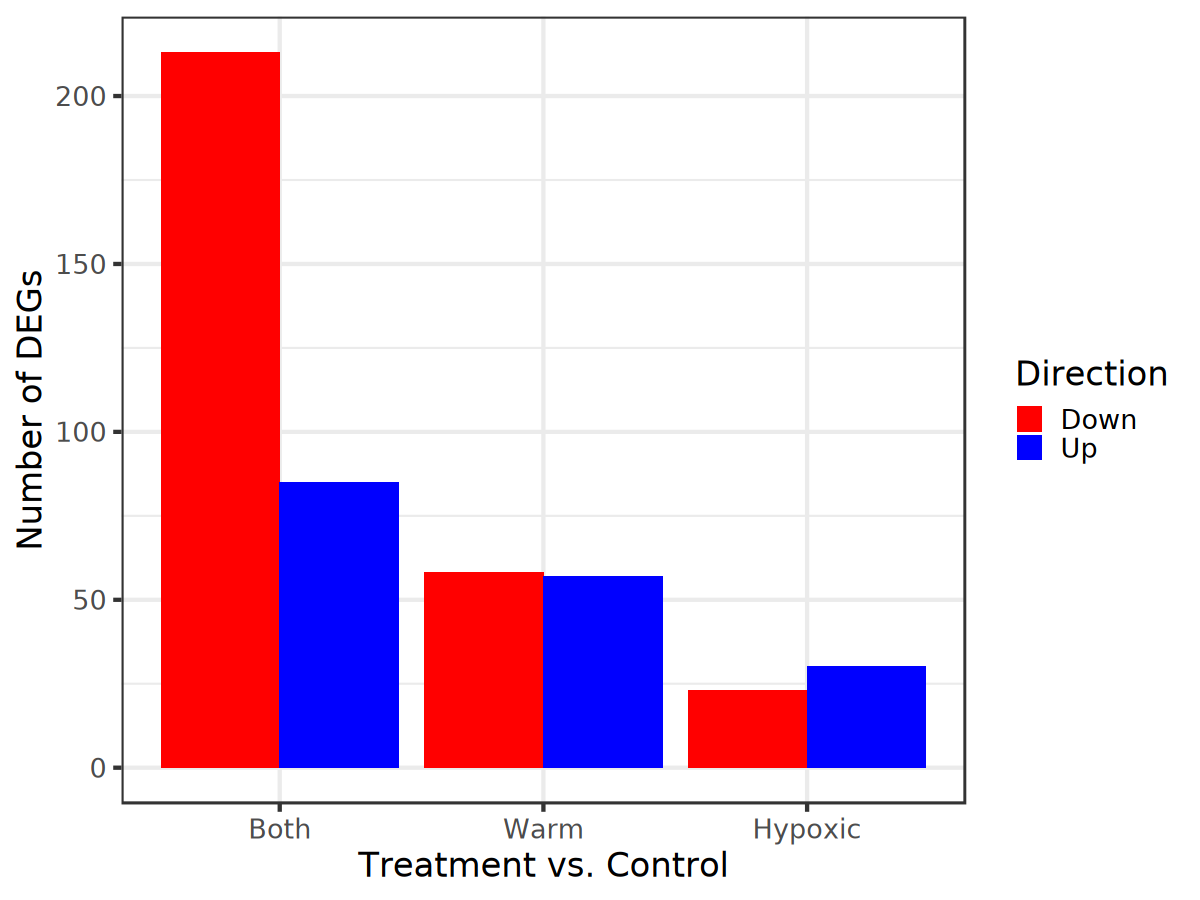

In [27]:
# change dimensions of output
options(repr.plot.width=10, repr.plot.height=7.5)

# reorder treatments
vs.cont.df$vs_control <- factor(vs.cont.df$vs_control, levels = c("Both", "Warm", "Hypoxic"))

# plot
ggplot(vs.cont.df, aes(x = vs_control, 
                       y = n, fill = direction)) +
geom_bar(stat = 'identity',
         position = position_dodge()) + 
scale_fill_manual(values=c('red', 'blue')) +
theme_bw(base_size = 20) +
labs(fill = 'Direction',
     x = 'Treatment vs. Control',
     y = 'Number of DEGs') 

**Observations**:
- B vs. C had the most DEGs, with the majority of those being down-regulated
- W vs. C have roughly 50:50 up- and down-regulated DEGs
- H vs. C resulted in the least amount of DEGs, with the *slight* majority of those being up-regulated